In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'C:/Users/Augus/Desktop/fl_ev_registration_population work.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   year state           county  \
0  2018    FL   Alachua County   
1  2018    FL     Baker County   
2  2018    FL       Bay County   
3  2018    FL  Bradford County   
4  2018    FL   Brevard County   

                                           zip_codes  population  \
0  [32601, 32602, 32603, 32604, 32605, 32606, 326...    268851.0   
1                       [32040, 32063, 32072, 32087]     28353.0   
2  [32401, 32402, 32403, 32404, 32405, 32406, 324...    186240.0   
3                [32042, 32044, 32058, 32091, 32622]     27752.0   
4  [32754, 32775, 32780, 32781, 32782, 32783, 327...    595203.0   

   ev_registrations adopton rate  
0               766        0.28%  
1                 5        0.02%  
2               300        0.16%  
3                22        0.08%  
4              1881        0.32%  


In [2]:
# Convert 'adopton rate' column to numeric by stripping the '%' sign and converting to float
df['adopton rate'] = df['adopton rate'].str.rstrip('%').astype('float') / 100

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display the data types of each column
print("\nData types of each column:\n", df.dtypes)

Missing values in each column:
 year                0
state               0
county              4
zip_codes           4
population          4
ev_registrations    0
adopton rate        4
dtype: int64

Data types of each column:
 year                  int64
state                object
county               object
zip_codes            object
population          float64
ev_registrations      int64
adopton rate        float64
dtype: object


In [3]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print("Data after removing missing values:")
print(df_cleaned.head())

# Check for any remaining missing values
print("\nRemaining missing values in each column:\n", df_cleaned.isnull().sum())


Data after removing missing values:
   year state           county  \
0  2018    FL   Alachua County   
1  2018    FL     Baker County   
2  2018    FL       Bay County   
3  2018    FL  Bradford County   
4  2018    FL   Brevard County   

                                           zip_codes  population  \
0  [32601, 32602, 32603, 32604, 32605, 32606, 326...    268851.0   
1                       [32040, 32063, 32072, 32087]     28353.0   
2  [32401, 32402, 32403, 32404, 32405, 32406, 324...    186240.0   
3                [32042, 32044, 32058, 32091, 32622]     27752.0   
4  [32754, 32775, 32780, 32781, 32782, 32783, 327...    595203.0   

   ev_registrations  adopton rate  
0               766        0.0028  
1                 5        0.0002  
2               300        0.0016  
3                22        0.0008  
4              1881        0.0032  

Remaining missing values in each column:
 year                0
state               0
county              0
zip_codes           0
pop

In [4]:
# Group by year to calculate total EV registrations per year
total_ev_registrations_per_year = df_cleaned.groupby('year')['ev_registrations'].sum().reset_index()

# Display the total EV registrations per year
print("Total EV Registrations Per Year:")
print(total_ev_registrations_per_year)

Total EV Registrations Per Year:
   year  ev_registrations
0  2018             65408
1  2019             55202
2  2020            132569
3  2021             90184


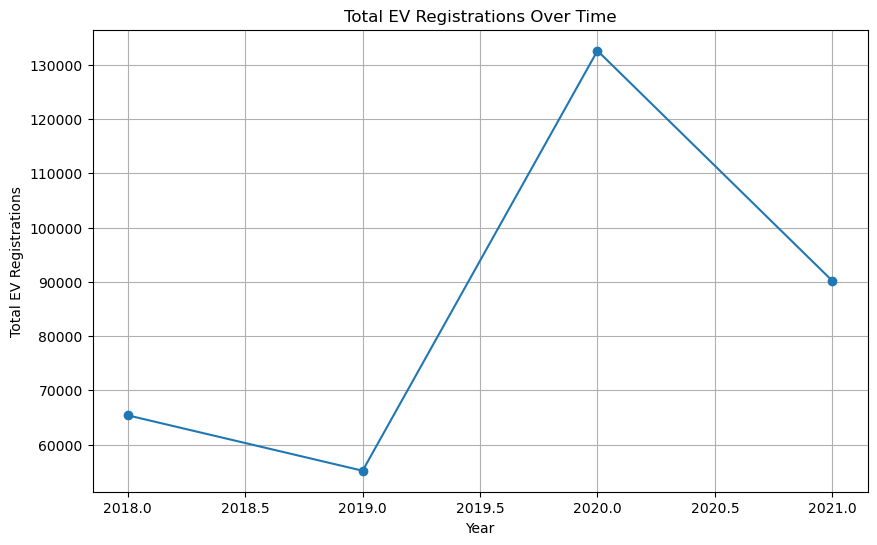

In [5]:
import matplotlib.pyplot as plt

# Plot total EV registrations over time
plt.figure(figsize=(10, 6))
plt.plot(total_ev_registrations_per_year['year'], total_ev_registrations_per_year['ev_registrations'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total EV Registrations')
plt.title('Total EV Registrations Over Time')
plt.grid(True)
plt.show()

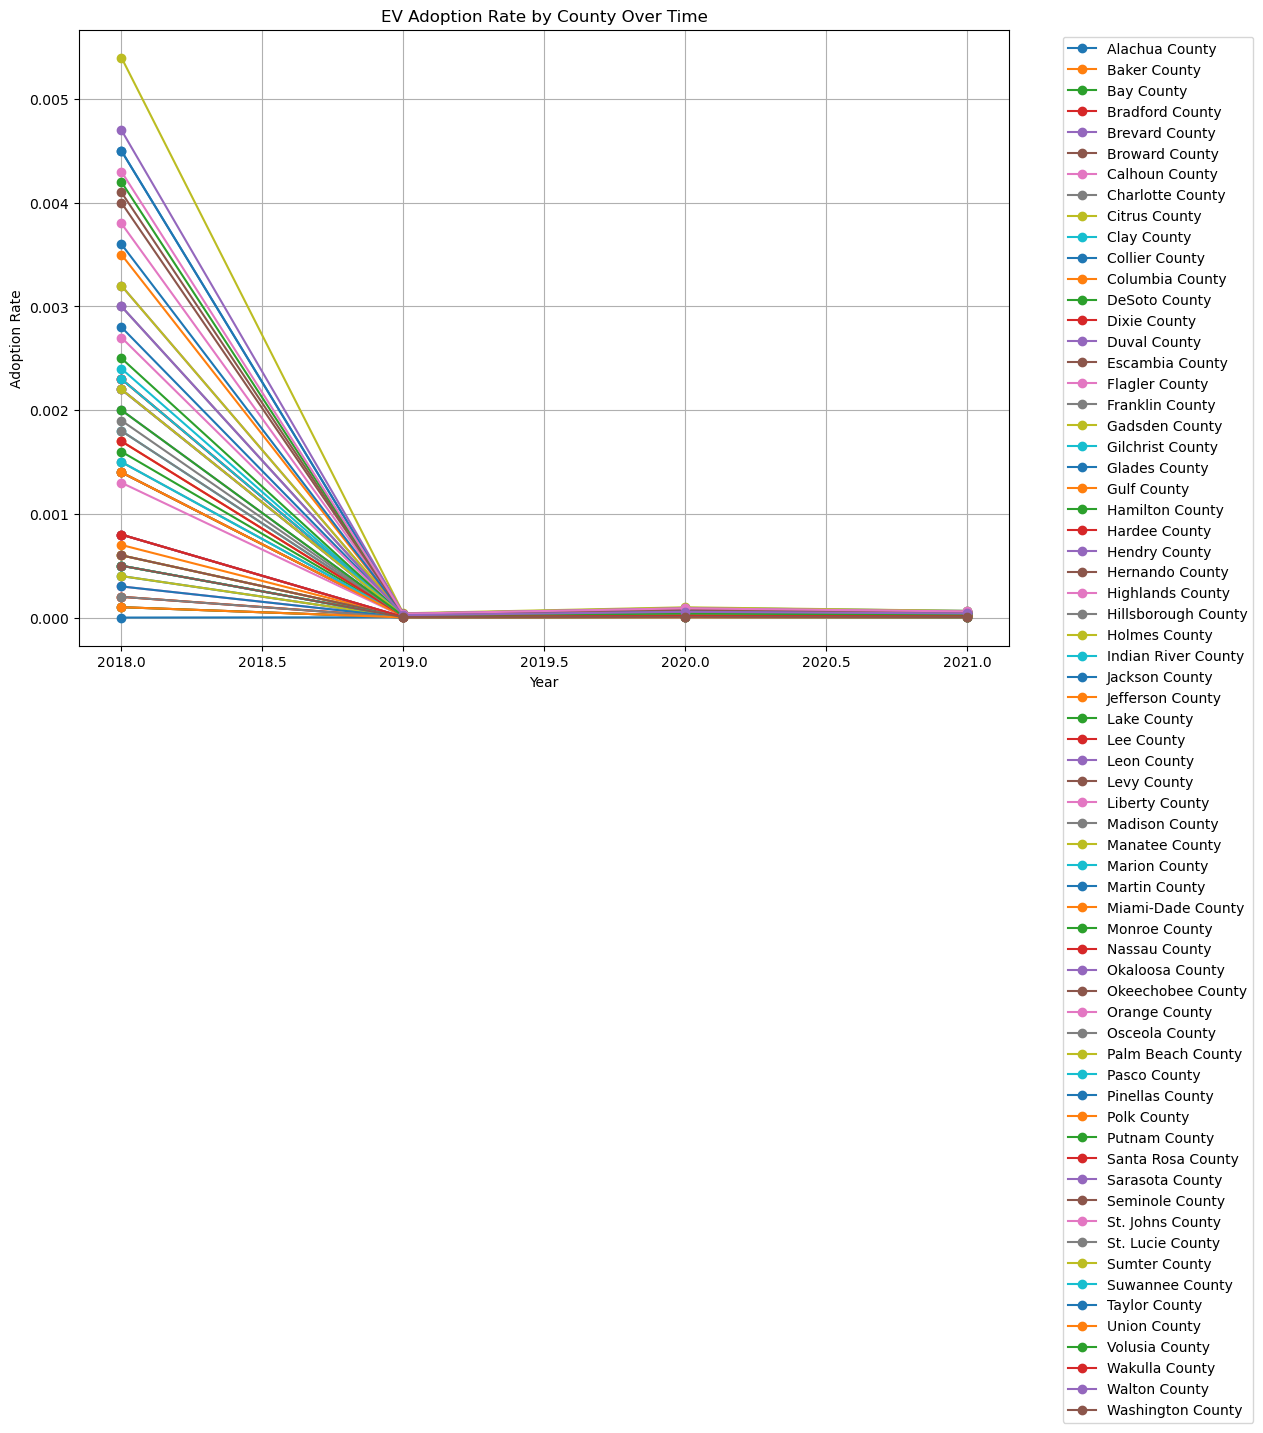

In [6]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Group data by county and year, then calculate the mean adoption rate
counties = df_cleaned['county'].unique()
for county in counties:
    county_data = df_cleaned[df_cleaned['county'] == county]
    plt.plot(county_data['year'], county_data['adopton rate'], marker='o', linestyle='-', label=county)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Adoption Rate')
plt.title('EV Adoption Rate by County Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend to be outside the plot
plt.grid(True)
plt.show()

In [7]:
# Calculate the standard deviation of the adoption rate for each county
std_dev_by_county = df_cleaned.groupby('county')['adopton rate'].std().reset_index()

# Set a threshold for identifying "sporadic" counties (mean + standard deviation)
std_threshold = std_dev_by_county['adopton rate'].mean() + std_dev_by_county['adopton rate'].std()

# Identify counties with standard deviation above the threshold
sporadic_counties = std_dev_by_county[std_dev_by_county['adopton rate'] > std_threshold]['county'].tolist()

# Print the list of counties with drastic changes
print("Counties with drastic changes in EV adoption rates:")
for county in sporadic_counties:
    print(county)


Counties with drastic changes in EV adoption rates:
Broward County
Collier County
Martin County
Miami-Dade County
Monroe County
Orange County
Palm Beach County
Pinellas County
Sarasota County
Seminole County
St. Johns County


In [8]:
import pandas as pd

# Revised assumptions for Florida
revenue_per_ev = 35000  # Average revenue per EV sold in Florida
production_cost_per_ev = 28000  # Estimated production cost per EV in Florida
fixed_costs = 8000000  # Fixed costs in dollars per year in Florida

In [9]:
# Initialize a DataFrame to store the profit model results
profit_data = {
    'Year': [],
    'County': [],
    'EVs Sold': [],
    'Revenue ($)': [],
    'Total Costs ($)': [],
    'Profit ($)': []
}

# Calculate profit for each county and year
for _, row in df_cleaned.iterrows():
    year = row['year']
    county = row['county']
    adoption_rate = row['adopton rate']
    population = row['population']
    evs_sold = population * adoption_rate
    revenue = evs_sold * revenue_per_ev
    variable_costs = evs_sold * production_cost_per_ev
    total_costs = fixed_costs + variable_costs
    profit = revenue - total_costs
    
    # Store results in the data dictionary
    profit_data['Year'].append(year)
    profit_data['County'].append(county)
    profit_data['EVs Sold'].append(evs_sold)
    profit_data['Revenue ($)'].append(revenue)
    profit_data['Total Costs ($)'].append(total_costs)
    profit_data['Profit ($)'].append(profit)

# Convert the profit data dictionary to a DataFrame
df_profit = pd.DataFrame(profit_data)

# Display the profit model DataFrame
print("Profit Model:")
print(df_profit.head())


Profit Model:
   Year           County   EVs Sold  Revenue ($)  Total Costs ($)  Profit ($)
0  2018   Alachua County   752.7828   26347398.0       29077918.4  -2730520.4
1  2018     Baker County     5.6706     198471.0        8158776.8  -7960305.8
2  2018       Bay County   297.9840   10429440.0       16343552.0  -5914112.0
3  2018  Bradford County    22.2016     777056.0        8621644.8  -7844588.8
4  2018   Brevard County  1904.6496   66662736.0       61330188.8   5332547.2


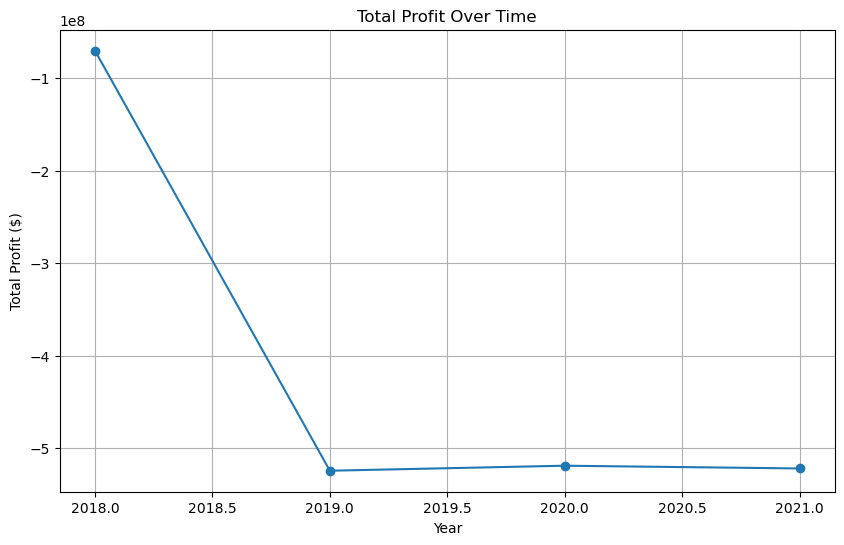

In [10]:
import matplotlib.pyplot as plt

# Calculate total profit per year
total_profit_per_year = df_profit.groupby('Year')['Profit ($)'].sum().reset_index()

# Plot total profit over time
plt.figure(figsize=(10, 6))
plt.plot(total_profit_per_year['Year'], total_profit_per_year['Profit ($)'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Profit ($)')
plt.title('Total Profit Over Time')
plt.grid(True)
plt.show()


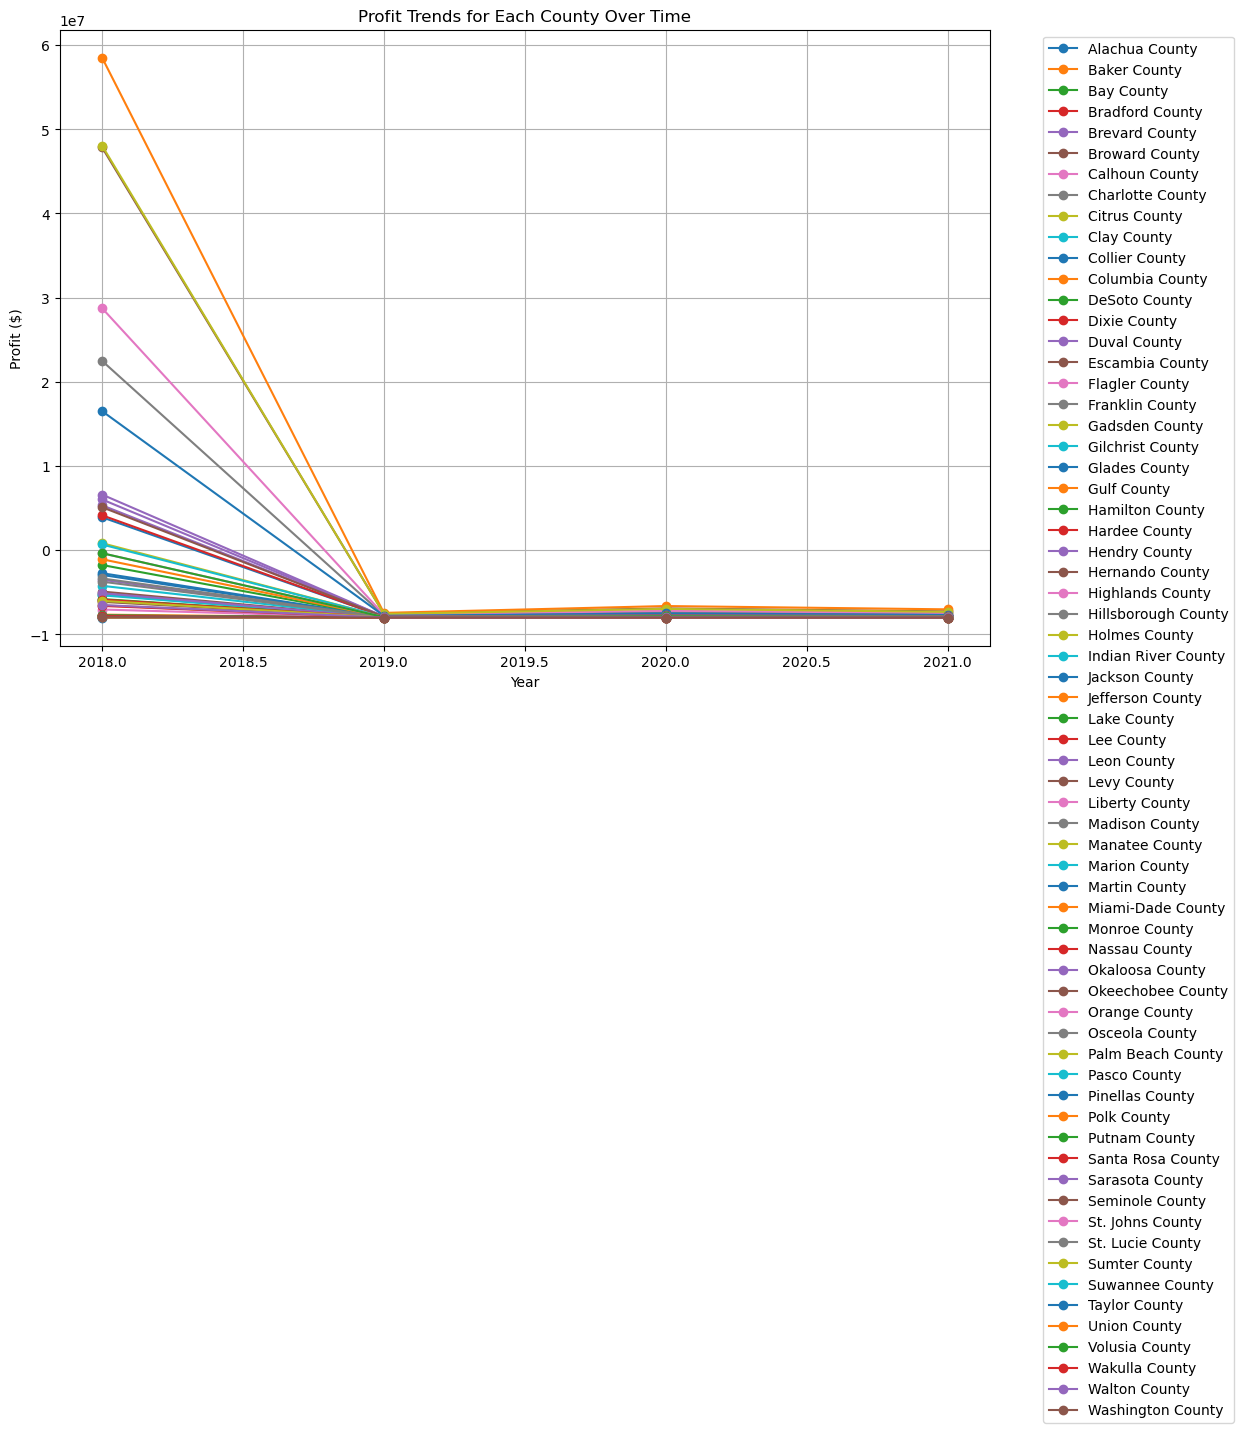

In [11]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(12, 8))

# Get a list of unique counties
counties = df_profit['County'].unique()

# Plot the profit trend for each county
for county in counties:
    county_data = df_profit[df_profit['County'] == county]
    plt.plot(county_data['Year'], county_data['Profit ($)'], marker='o', linestyle='-', label=county)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.title('Profit Trends for Each County Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot for clarity
plt.grid(True)
plt.show()

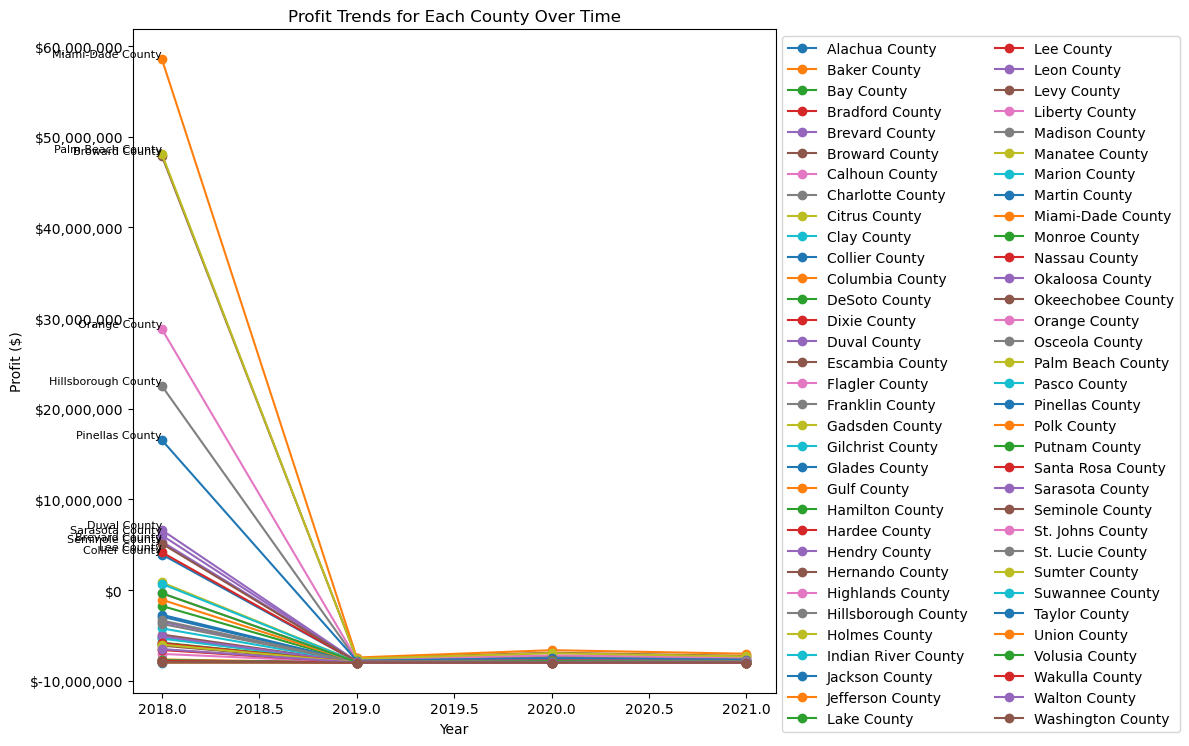

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each county to plot its data
for county in df_profit['County'].unique():
    county_data = df_profit[df_profit['County'] == county]
    ax.plot(county_data['Year'], county_data['Profit ($)'], marker='o', label=county)

    # Find the row with the maximum profit for the county, only if the maximum is above -500,000
    max_profit_row = county_data[county_data['Profit ($)'] > 2500000].nlargest(1, 'Profit ($)')
    
    # Add label at the highest profit point
    if not max_profit_row.empty:
        for i, row in max_profit_row.iterrows():
            ax.text(row['Year'], row['Profit ($)'], f"{county}", fontsize=8, ha='right', va='bottom')

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Profit ($)')
ax.set_title('Profit Trends for Each County Over Time')

# Format y-axis to display in dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Adjust the legend
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=2)

# Ensure layout is adjusted to fit
plt.tight_layout()

# Display the plot
plt.show()